In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [58]:
np.random.seed(0)
X_1 = np.random.normal(0, 1, 10000)
X_2 = np.random.normal(0, 1, 10000)
X_3 = np.random.normal(0, 1, 10000)

epsilon = np.random.normal(0, 1, 10000)

beta_0 = 100
beta_1 = 0
beta_2 = 0
beta_3 = 4

Y = beta_0 + beta_1*X_1 + beta_2*X_2 + beta_3*X_3 + epsilon

xy_observation = np.array([X_1.tolist(), X_2.tolist(), X_3.tolist(), Y.tolist()]).transpose()

In [59]:
%%time

sample_size = 100

est_coefficients_list = []
SSR_unrest_list = [] 

est_coefficients_res_list = []
SSR_res_list = []

for i in range(10000):
    inx = np.random.randint(10000, size=sample_size)
    sample = xy_observation[inx]
    sample = sm.add_constant(sample)
    
    ### Unrestricted Model #######################################################
    sample_results = sm.OLS(sample[:,4], sample[:,0:4]).fit()
    beta_0_hat = sample_results.params[0]
    beta_1_hat = sample_results.params[1]
    beta_2_hat = sample_results.params[2]
    beta_3_hat = sample_results.params[3]
    
    est_coefficients = [beta_0_hat, beta_1_hat, beta_2_hat, beta_3_hat]
    
    SSR_unrest = np.sum(np.square(sample[:,4]-(beta_0_hat*sample[:,0])
                                  -(beta_1_hat*sample[:,1])
                                  -(beta_2_hat*sample[:,2])
                                  -(beta_3_hat*sample[:,3])))
    
    SSR_unrest_list.append(SSR_unrest)
    est_coefficients_list.append(est_coefficients)
    
    
    ### Restricted Model #########################################################
    sample_results_res = sm.OLS(sample[:,4], sample[:,[0,3]]).fit()
    beta_0_hat_res = sample_results_res.params[0]
    beta_3_hat_res = sample_results_res.params[1]
    
    est_coefficients_res = [beta_0_hat_res, beta_3_hat_res]
    
    SSR_res = np.sum(np.square(sample[:,4]-(beta_0_hat_res*sample[:,0])
                               -(beta_3_hat_res*sample[:,3])))
    
    SSR_res_list.append(SSR_res)
    est_coefficients_res_list.append(est_coefficients_res)
    
    
est_coefficients_list = np.array(est_coefficients_list)
SSR_unrest_list = np.array(SSR_unrest_list)

est_coefficients_res_list = np.array(est_coefficients_res_list)
SSR_res_list = np.array(SSR_res_list)

Wall time: 7.15 s


In [60]:
# q is # of restrictions
q = 2 
dfn = q 

# k is # of regressors in unrestricted model 
k = 3 
dfd = sample_size - k -1

In [61]:
num = (SSR_res_list - SSR_unrest_list)/dfn
denom = SSR_unrest_list/dfd

In [62]:
print(num)
print(denom)

[0.35414637 0.39482391 0.18054108 ... 1.21624372 1.36216567 0.32551387]
[1.0035583  0.94070997 0.91723158 ... 1.04449797 1.15389236 1.14256303]


In [63]:
F = num/denom

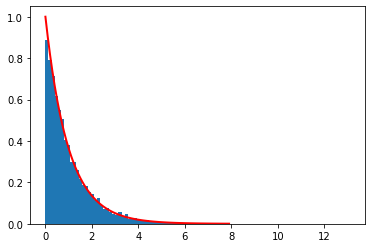

In [64]:
x = np.arange(0, 8, 0.1)
plt.hist(F, bins=100, density=True)
plt.plot(x, stats.f.pdf(x, dfn, dfd), lw=2, color="red")
plt.show()

#### Let's take a sample and generate a regression table 

In [65]:
inx = np.random.randint(10000, size=sample_size)
sample = xy_observation[inx]
sample = sm.add_constant(sample)

sample_results = sm.OLS(sample[:,4], sample[:,0:4]).fit()

In [71]:
### Unrestricted Model #######################################################
beta_0_hat = sample_results.params[0]
beta_1_hat = sample_results.params[1]
beta_2_hat = sample_results.params[2]
beta_3_hat = sample_results.params[3]

est_coefficients = [beta_0_hat, beta_1_hat, beta_2_hat, beta_3_hat]

SSR_unrest = np.sum(np.square(sample[:,4]-(beta_0_hat*sample[:,0])
                              -(beta_1_hat*sample[:,1])
                              -(beta_2_hat*sample[:,2])
                              -(beta_3_hat*sample[:,3])))


### Restricted Model #########################################################
sample_results_res = sm.OLS(sample[:,4], sample[:,[0,3]]).fit()
beta_0_hat_res = sample_results_res.params[0]
beta_3_hat_res = sample_results_res.params[1]

est_coefficients_res = [beta_0_hat_res, beta_3_hat_res]

SSR_res = np.sum(np.square(sample[:,4]-(beta_0_hat_res*sample[:,0])
                           -(beta_3_hat_res*sample[:,3])))

# q is # of restrictions
q = 2 
dfn = q 

# k is # of regressors in unrestricted model 
k = 3 
dfd = sample_size - k -1

numerator = (SSR_res - SSR_unrest)/dfn
denominator = SSR_unrest/dfd

F_stat = numerator/denominator

In [69]:
print(F_stat)

1.9015809971416064


In [70]:
print(sample_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     586.4
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.42e-61
Time:                        20:34:10   Log-Likelihood:                -137.56
No. Observations:                 100   AIC:                             283.1
Df Residuals:                      96   BIC:                             293.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8243      0.100   1000.481      0.0

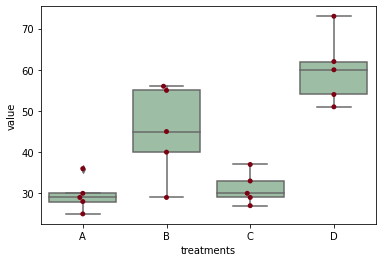

In [73]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [75]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [74]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

17.492810457516338 2.639241146210922e-05


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN
